In [1]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
import preprocessing
import yfinance as yf

# FOR REPRODUCIBILITY
np.random.seed(7)

In [2]:
# IMPORTING DATASET 
#Training dataset
dataset_train = pd.read_csv('AMZN-8Y-train.csv', usecols=[1,2,3,4])
dataset_train.head()

,Open,High,Low,Close
0,215.490005,216.080002,213.000000,213.490005
1,214.990005,215.600006,210.350006,214.179993
2,224.389999,227.199997,219.619995,222.520004
3,223.270004,225.949997,220.229996,223.899994
4,221.289993,225.750000,219.509995,222.520004


In [3]:
#Testing dataset 
dataset_test=yf.download(tickers='AMZN',period='1y',interval='1d')
dataset_test=dataset_test.iloc[:,0:4]
test_dates=dataset_test.index
dataset_test.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2020-10-02,3153.629883,3195.800049,3123.000000,3125.000000
2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951
2020-10-06,3165.000000,3182.000000,3090.000000,3099.959961
2020-10-07,3135.000000,3200.000000,3132.389893,3195.689941
2020-10-08,3224.989990,3233.290039,3174.989990,3190.550049


In [4]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs_train = np.arange(1, len(dataset_train) + 1, 1)
obs_test = np.arange(1, len(dataset_test) + 1, 1)
obs=np.arange(1, len(dataset_test)+len(dataset_train) + 1, 1)


In [5]:
# TAKING DIFFERENT INDICATORS FOR PREDICTION
#Train
OHLC_avg_train = dataset_train.mean(axis = 1)
OHLC_avg_test = dataset_test.mean(axis = 1)
OHLC_avg=np.concatenate((OHLC_avg_train,OHLC_avg_test),axis=0)

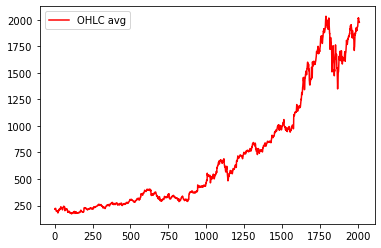

In [6]:
# PLOTTING ALL INDICATORS IN ONE PLOT
#train
plt.plot(obs_train, OHLC_avg_train, 'r', label = 'OHLC avg')
plt.legend(loc = 'upper left')
plt.show()


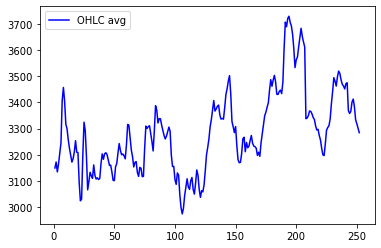

In [7]:
plt.plot(obs_test, OHLC_avg_test, 'b', label = 'OHLC avg')
plt.legend(loc = 'upper left')
plt.show()

In [8]:
# PREPARATION OF TIME SERIES DATASE
#Train
OHLC_avg_train = np.reshape(OHLC_avg_train.values, (len(OHLC_avg_train),1)) 
OHLC_avg_test = np.reshape(OHLC_avg_test.values, (len(OHLC_avg_test),1))

scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg_train = scaler.fit_transform(OHLC_avg_train)
#print(OHLC_avg_train)
#Test
OHLC_avg_test = scaler.fit_transform(OHLC_avg_test)
#print(OHLC_avg_test)
OHLC_avg=np.concatenate((OHLC_avg_train,OHLC_avg_test),axis=0)


In [9]:
train_OHLC=OHLC_avg_train
test_OHLC=OHLC_avg_test

In [10]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)
testX, testY = preprocessing.new_dataset(test_OHLC, 1)

In [11]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#print(trainX)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#print(testX)

In [12]:
step_size = 1
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(16, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(8))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('linear'))

In [13]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=150, batch_size=10, verbose=2)

Epoch 1/150
201/201 - 29s - loss: 0.0773
Epoch 2/150
201/201 - 1s - loss: 0.0089
Epoch 3/150
201/201 - 1s - loss: 0.0061
Epoch 4/150
201/201 - 1s - loss: 0.0052
Epoch 5/150
201/201 - 1s - loss: 0.0041
Epoch 6/150
201/201 - 1s - loss: 0.0047
Epoch 7/150
201/201 - 1s - loss: 0.0032
Epoch 8/150
201/201 - 1s - loss: 0.0038
Epoch 9/150
201/201 - 1s - loss: 0.0031
Epoch 10/150
201/201 - 1s - loss: 0.0029
Epoch 11/150
201/201 - 1s - loss: 0.0029
Epoch 12/150
201/201 - 1s - loss: 0.0028
Epoch 13/150
201/201 - 1s - loss: 0.0029
Epoch 14/150
201/201 - 1s - loss: 0.0028
Epoch 15/150
201/201 - 1s - loss: 0.0028
Epoch 16/150
201/201 - 1s - loss: 0.0029
Epoch 17/150
201/201 - 1s - loss: 0.0025
Epoch 18/150
201/201 - 1s - loss: 0.0028
Epoch 19/150
201/201 - 1s - loss: 0.0026
Epoch 20/150
201/201 - 1s - loss: 0.0028
Epoch 21/150
201/201 - 1s - loss: 0.0025
Epoch 22/150
201/201 - 1s - loss: 0.0028
Epoch 23/150
201/201 - 1s - loss: 0.0027
Epoch 24/150
201/201 - 1s - loss: 0.0027
Epoch 25/150
201/201 - 1

In [14]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [15]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [16]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 11.42
Test RMSE: 46.69


In [17]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[step_size: len(testPredict)+step_size, :] = testPredict

In [18]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg_train = scaler.inverse_transform(OHLC_avg_train)

OHLC_avg_test = scaler.inverse_transform(OHLC_avg_test)
OHLC_avg = scaler.inverse_transform(OHLC_avg)

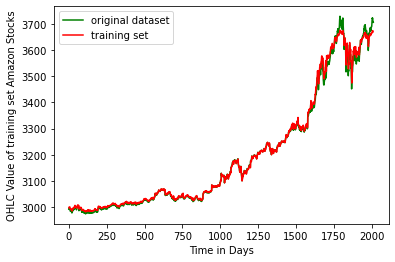

In [19]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg_train, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of training set Amazon Stocks')
plt.show()

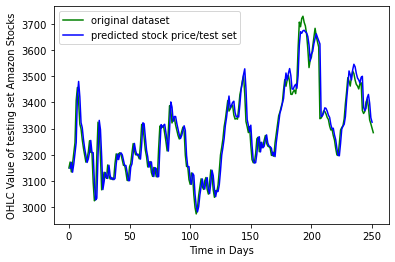

In [20]:
plt.plot(OHLC_avg_test, 'g', label = 'original dataset')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of testing set Amazon Stocks')
plt.show()

In [21]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
actual_val = OHLC_avg_test[-1]
diff = abs(last_val-actual_val)
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print (test_dates[-1],"Predicted Value:", np.asscalar(last_val))
print ("Actual value:",np.asscalar(actual_val))
print ("Difference value:", np.asscalar(diff))
print ("Next Day Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

2021-10-01 00:00:00 Predicted Value: 3324.330322265625
Actual value: 3284.3449707031245
Difference value: 39.985351562500455
Next Day Value: 3088.37158203125


<ipython-input-21-87e4489de2a8>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print (test_dates[-1],"Predicted Value:", np.asscalar(last_val))
<ipython-input-21-87e4489de2a8>:8: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print ("Actual value:",np.asscalar(actual_val))
<ipython-input-21-87e4489de2a8>:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print ("Difference value:", np.asscalar(diff))
<ipython-input-21-87e4489de2a8>:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print ("Next Day Value:", np.asscalar(last_val*next_val))
